In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet/resnet101_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/infrared-solar-modules/LICENSE
/kaggle/input/infrared-solar-modules/README.md
/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/module_metadata.json


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
import random
import tensorflow as tf
import numpy as np

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential


In [ ]:
import pandas as pd
import json
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [ ]:
with open('/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/module_metadata.json', 'r') as file:
    data = json.load(file)

In [ ]:
df = pd.DataFrame(data).T.reset_index(drop=True)

In [ ]:
def load_images(dataframe, base_path="/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/"):
    images = []
    labels = []
    i = 0
    for idx, row in dataframe.iterrows():
        i+=1
        img_path = base_path + row['image_filepath']
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))  # Resize the image
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize to [0, 1]
        images.append(img_array)
        labels.append(row['anomaly_class'])
        #print(f'{i} Done out of {dataframe.shape[0]}')     # enable if you need to check the itrs of reading
    return np.array(images), np.array(labels)

In [ ]:
# Split data into features and target || Convert labels to categorical codes
X = df['image_filepath']
y = pd.Categorical(df['anomaly_class']).codes 

print(len(X))

In [ ]:
# Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
# Convert Series to DataFrame to reuse the load_images function
train_df = pd.DataFrame({'image_filepath': X_train, 'anomaly_class': y_train})
val_df = pd.DataFrame({'image_filepath': X_val, 'anomaly_class': y_val})
test_df = pd.DataFrame({'image_filepath': X_test, 'anomaly_class': y_test})

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

In [10]:
# Load and preprocess images
train_images, train_labels = load_images(train_df)
print("Train Read Done..!")
val_images, val_labels = load_images(val_df)
print("Validation Read Done..!")
test_images, test_labels = load_images(test_df)
print("Test Read Done..!")

Validation Read Done..!
Test Read Done..!


In [11]:
# Optionally, convert labels to categorical format if using categorical crossentropy
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [12]:
import cv2 as cv 
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from keras.layers import Bidirectional
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, VGG19,ResNet50,ResNet101, ResNet152, InceptionV3, MobileNet, DenseNet121, DenseNet169, DenseNet201, NASNetMobile, Xception


In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.utils import to_categorical
import cv2 as cv
import tensorflow as tf



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Using base model: vgg16
Unfroze the last 20 layers of vgg16.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with fine-tuning and MHA.
Data reshaped to (12000, 128, 128, 3).


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728921243.874813     106 service.cc:145] XLA service 0x7c0de0002050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728921243.874878     106 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1728921254.767514     106 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill 

Epoch 1: Train Accuracy: 0.5427, Train Loss: 1.5731
Epoch 2: Train Accuracy: 0.6135, Train Loss: 1.3013
Epoch 3: Train Accuracy: 0.6400, Train Loss: 1.1949
Epoch 4: Train Accuracy: 0.6572, Train Loss: 1.1450
Epoch 5: Train Accuracy: 0.6657, Train Loss: 1.1048
Epoch 6: Train Accuracy: 0.6808, Train Loss: 1.0595
Epoch 7: Train Accuracy: 0.6898, Train Loss: 1.0026
Epoch 8: Train Accuracy: 0.6931, Train Loss: 0.9872
Epoch 9: Train Accuracy: 0.7087, Train Loss: 0.9430
Epoch 10: Train Accuracy: 0.7080, Train Loss: 0.9091
Epoch 11: Train Accuracy: 0.7260, Train Loss: 0.8808
Epoch 12: Train Accuracy: 0.7299, Train Loss: 0.8597
Epoch 13: Train Accuracy: 0.7352, Train Loss: 0.8347
Epoch 14: Train Accuracy: 0.7427, Train Loss: 0.8224
Epoch 15: Train Accuracy: 0.7480, Train Loss: 0.7877
Epoch 16: Train Accuracy: 0.7545, Train Loss: 0.7768
Epoch 17: Train Accuracy: 0.7577, Train Loss: 0.7541
Epoch 18: Train Accuracy: 0.7597, Train Loss: 0.7497
Epoch 19: Train Accuracy: 0.7638, Train Loss: 0.7273
Ep

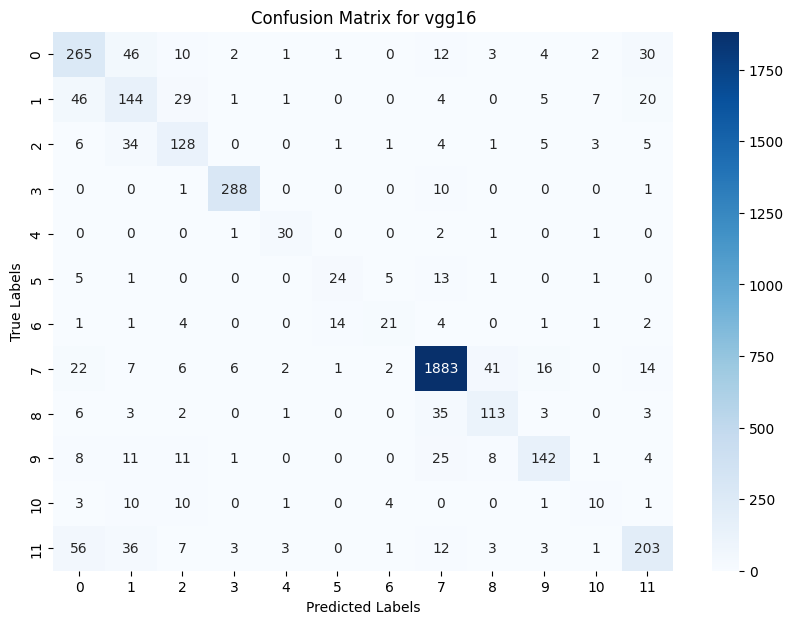

Using base model: vgg19
Unfroze the last 20 layers of vgg19.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with fine-tuning and MHA.
Data reshaped to (12000, 128, 128, 3).


I0000 00:00:1728925806.964315     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads



Epoch 1: Train Accuracy: 0.5181, Train Loss: 1.6807
Epoch 2: Train Accuracy: 0.5943, Train Loss: 1.3569
Epoch 3: Train Accuracy: 0.6204, Train Loss: 1.2750
Epoch 4: Train Accuracy: 0.6325, Train Loss: 1.2181
Epoch 5: Train Accuracy: 0.6373, Train Loss: 1.1906
Epoch 6: Train Accuracy: 0.6441, Train Loss: 1.1732
Epoch 7: Train Accuracy: 0.6482, Train Loss: 1.1362
Epoch 8: Train Accuracy: 0.6609, Train Loss: 1.1123
Epoch 9: Train Accuracy: 0.6680, Train Loss: 1.0811
Epoch 10: Train Accuracy: 0.6734, Train Loss: 1.0612
Epoch 11: Train Accuracy: 0.6808, Train Loss: 1.0450
Epoch 12: Train Accuracy: 0.6897, Train Loss: 1.0054
Epoch 13: Train Accuracy: 0.6942, Train Loss: 0.9851
Epoch 14: Train Accuracy: 0.7041, Train Loss: 0.9504
Epoch 15: Train Accuracy: 0.7128, Train Loss: 0.9176
Epoch 18: Train Accuracy: 0.7307, Train Loss: 0.8560
Epoch 19: Train Accuracy: 0.7371, Train Loss: 0.8436
Epoch 20: Train Accuracy: 0.7427, Train Loss: 0.8205
Epoch 21: Train Accuracy: 0.7488, Train Loss: 0.8071
Ep

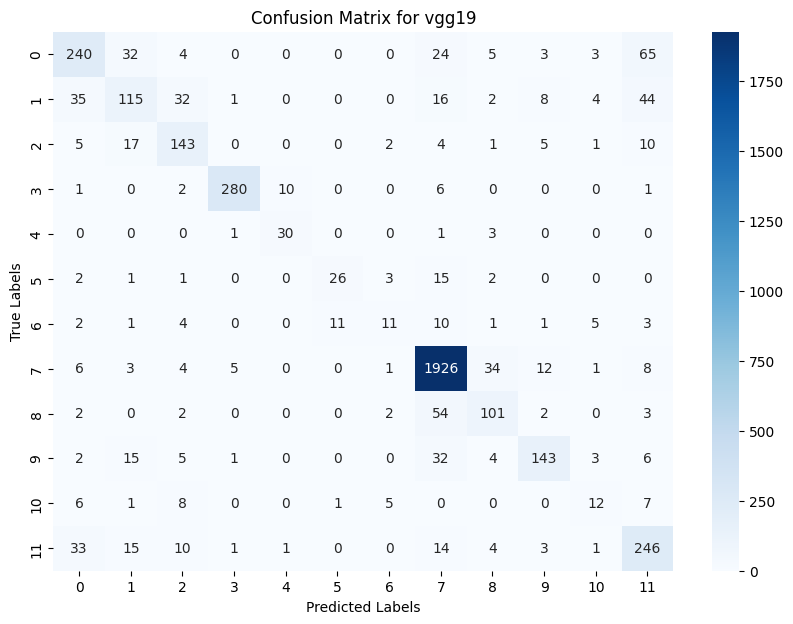

Training complete. Saving results to Excel...
Results saved successfully.


In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D, MultiHeadAttention, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
import cv2 as cv
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Callback for logging after each epoch
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Train Accuracy: {logs['accuracy']:.4f}, Train Loss: {logs['loss']:.4f}")

# Function to reshape data for uniform input
def reshape_data(data, new_shape):
    reshaped_data = np.zeros((data.shape[0],) + new_shape)
    for i in range(data.shape[0]):
        reshaped_data[i] = cv.resize(data[i], new_shape[:2])  # Resize images to (height, width)
    return reshaped_data

# Function to prepare base model for fine-tuning
def prepare_fine_tuning(base_model, trainable_layers=30):
    # Freeze all layers first
    for layer in base_model.layers:
        layer.trainable = False
    # Unfreeze the last `trainable_layers`
    for layer in base_model.layers[-trainable_layers:]:
        layer.trainable = True
    print(f"Unfroze the last {trainable_layers} layers of {base_model.name}.")
    return base_model

# Load base models (DenseNet or other architectures)
base_models = [
    VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
]

# Hyperparameters for training
learning_rates = [0.001]
epochs_list = [80]
input_shape = (128, 128, 3)
results = []

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assume `train_images` and `train_labels` are preloaded
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

# Function to add a Multi-Head Attention Layer
def add_mha_layer(input_tensor, num_heads=4, key_dim=64):
    mha_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(input_tensor, input_tensor)
    norm_output = LayerNormalization()(mha_output)  # Normalization after attention
    return norm_output

# Final architecture (with adjustments)
for base_model in base_models:
    print(f"Using base model: {base_model.name}")

    # Prepare the base model for fine-tuning (unfreeze layers)
    base_model = prepare_fine_tuning(base_model, trainable_layers=20)

    for lr in learning_rates:
        print(f"Learning rate: {lr}")

        for epochs in epochs_list:
            print(f"Training for {epochs} epochs...")

            # Functional API model
            input_layer = Input(shape=(128, 128, 3))
            x = base_model(input_layer, training=False)  # Use the base model's feature map
            # Apply MHA to the spatial dimensions before pooling
            mha_output = add_mha_layer(x, num_heads=4, key_dim=64)
            # Apply Global Average Pooling
            x = GlobalAveragePooling2D()(mha_output)
            x = Dense(128, activation='relu')(x)  # Dense layer after pooling

            # Final Dense layers
            x = Dense(64, activation='relu')(x)
            output_layer = Dense(12, activation='softmax')(x)  # Final classification layer

            model = Model(inputs=input_layer, outputs=output_layer)
            model.compile(optimizer=Adam(learning_rate=lr * 0.1), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

            print("CNN model created successfully with fine-tuning and MHA.")

            # Reshape the data
            reshaped_x_train = reshape_data(train_images, (128, 128, 3))  # Keep data in 128x128
            reshaped_x_test = reshape_data(test_images, (128, 128, 3))
            print(f"Data reshaped to {reshaped_x_train.shape}.")

            # Train the model using augmented data
            history = model.fit(train_generator, epochs=epochs, validation_data=(reshaped_x_test, test_labels),
                                callbacks=[EpochLogger()], verbose=0)

            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(reshaped_x_test, test_labels, verbose=0)
            print(f"Model fine-tuned successfully with MHA. Test accuracy: {test_accuracy:.4f}")
            
            # Predict on the test data
            predictions = model.predict(reshaped_x_test)
            predicted_classes = np.argmax(predictions, axis=1)
            true_classes = np.argmax(test_labels, axis=1)

            # Compute the confusion matrix
            cm = confusion_matrix(true_classes, predicted_classes)
            print(f"Confusion Matrix:\n{cm}")

            # Plot the confusion matrix
            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.title(f'Confusion Matrix for {base_model.name}')
            plt.show()

            # Save the results
            results.append([base_model.name, epochs, lr, test_accuracy])

# After all models have been trained
print("Training complete. Saving results to Excel...")

# Save results to Excel
df = pd.DataFrame(results, columns=['Model', 'Epochs', 'Learning Rate', 'Test Accuracy'])
df.to_excel('model_accuracies_with_mha_and_augmentation.xlsx', index=False)
print("Results saved successfully.")
